In [542]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from tabulate import tabulate
import matplotlib
import piecewise_regression
import json

In [543]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

def decimal(x):
    return x.replace(',', '.').encode()

def sum_err(x,sx):
    return np.sum(x),np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def diff_err(x,sx):
    return x[0]-x[1],np.sqrt(np.sum([np.sum(i**2) for i in sx])) 

def times_err(x,sx):
    return np.prod(x), np.prod(x)*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))

#def frac_err(x,sx):
#    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum((sx/x)**2))

def frac_err(x,sx):
    return x[0]/x[1], x[0]/x[1]*np.sqrt(np.sum([np.sum((i/j)**2) for i,j in zip(sx,x)]))
    #return [np.sum((i/j)**2) for i,j in zip(sx,x)]

In [544]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [545]:
def load_txt(name):
    t,pos = np.genfromtxt((decimal(x) for x in open(name)),unpack = True, skip_header=4)
    return t, pos

# ULOHA 1

In [250]:
t100 = 99.7
t0 = 0.7

In [251]:
a = 100/99
b = -0.7*a
print("{}t + {}".format(a,b))

1.0101010101010102t + -0.7070707070707071


In [256]:
def temp(t):
    return 100/99*t + -0.7*100/99

In [252]:
#def temp(t):
 #   return a*t + b

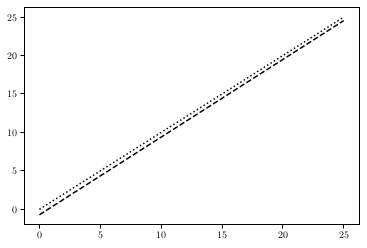

In [630]:
x_range = np.linspace(0,25,200)

plt.plot(x_range, temp(x_range), linestyle = 'dashed', color = 'k')
plt.plot(x_range, x_range, linestyle = 'dotted', color = 'k')

In [7]:
100/100.4*0.7

0.697211155378486

In [255]:
temp(99.7)

100.0

# ULOHA 2

## DATA

In [546]:
m0 = 240.58/1000 ### Kalorimetr
m1 = np.array([356.34, 374.96, 368.02])/1000 - m0 ### Voda
t1 = temp(np.array([21,31.2,40.2]))
m2 = np.array([455.8,430.36,449.32])/1000 - m1 -m0 ### Pridana voda
t2 = temp(np.array([49,74.8,89.5]))
t = temp(np.array([32.2,41.1,55.6]))
c = 4180

In [547]:
m1, t1

(array([0.11576, 0.13438, 0.12744]),
 array([20.50505051, 30.80808081, 39.8989899 ]))

In [548]:
m2, t2

(array([0.09946, 0.0554 , 0.0813 ]),
 array([48.78787879, 74.84848485, 89.6969697 ]))

In [549]:
k_raw = (m2*c)*(t2-t)/(t - t1) - m1*c
k_raw

array([139.7374    , 226.57204444, 215.37694286])

In [550]:
sk_raw = k_raw*np.sqrt(0.7**2/(t2-t)**2 + 0.7**2/(t - t1)**2)
sk_raw

array([10.39150119, 16.53024327, 10.64514545])

In [551]:
k = mean(k_raw)
sk = error(k_raw)
k, sk

(193.89546243386266, 22.266838172144563)

## HODNOTY

In [552]:
k,sk = weighted_error(k_raw, sk_raw)
k, sk

(185.04793319125525, 6.7814154913474445)

In [553]:
T = np.array([m1*1000,t1.round(1),m2*1000,t2.round(1),t.round(1)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrr}
\toprule
 115.76 & 20.5 & 99.46 & 48.8 & 31.8 \\
 134.38 & 30.8 & 55.4  & 74.8 & 40.8 \\
 127.44 & 39.9 & 81.3  & 89.7 & 55.5 \\
\bottomrule
\end{tabular}


In [554]:
T = np.array([k_raw.round(0),sk_raw.round(0)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 140 & 10 \\
 227 & 17 \\
 215 & 11 \\
\bottomrule
\end{tabular}


# ULOHA 3

## DATA

In [555]:
m1 = np.array([442.04,419.3,446.26]) - 240.58 ### voda
c1 = 4.18
m2 = np.array([114.52,364.24,334.78])### kalorimetr
k = 185.04793319125525
sk = 6.7814154913474445

T1 = temp(np.array([26,23.9,23.2]))
Tfinal = temp(np.array([23.2,19.7,19.8]))

In [556]:
c2 = (m1*c1+k)*(T1 - Tfinal)/(m2*Tfinal)
c2*1000

array([1116.16488258,  565.67815891,  555.53981576])

In [557]:
sc2 = c2*np.sqrt(0.7**2/(T1 - Tfinal)**2 + 0.5**2/Tfinal**2 + sk**2/k**2)
sc2*1000

array([280.3401775 ,  96.74043885, 115.94512631])

In [558]:
(c2-sc2)*1000

array([835.82470507, 468.93772005, 439.59468945])

## TABULKA

In [559]:
T = np.array([m1,T1.round(1),m2,Tfinal.round(1)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrr}
\toprule
 201.46 & 25.6 & 114.52 & 22.7 \\
 178.72 & 23.4 & 364.24 & 19.2 \\
 205.68 & 22.7 & 334.78 & 19.3 \\
\bottomrule
\end{tabular}


In [560]:
T = np.array([(c2*1000).round(0),(sc2*1000).round(0)]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 1116 & 280 \\
  566 &  97 \\
  556 & 116 \\
\bottomrule
\end{tabular}


## GRAF

C:\Users\stepa\AppData\Local\Temp/ipykernel_7396/4141922143.py:17: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


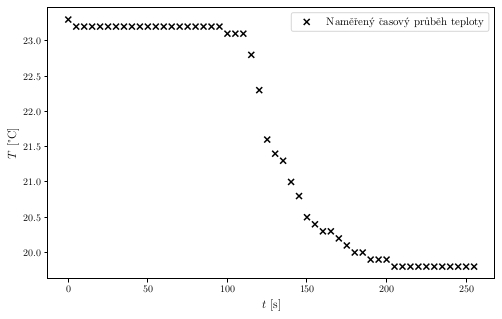

In [624]:
t1, T1 = load_txt('data/3.txt')

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x', label = 'Naměřený časový průběh teploty')
#plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

plt.legend(loc='upper right', fontsize=11)

#popisky os
plt.ylabel("$T$ [°C]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('ukazka_valecek.pdf', bbox_inches = 'tight')
plt.show()

## TEST

In [166]:
t, T = load_txt('data/1.txt')

In [168]:
T

array([25.2, 24.8, 24.7, 24.6, 24.5, 24.4, 24.4, 24.3, 24.2, 24.2, 24.1,
       24. , 24. , 23.9, 23.9, 23.8, 23.8, 23.7, 23.7, 23.6, 23.6, 23.5,
       23.5, 23.4, 23.4, 23.4, 23.3, 23.3, 23.3, 23.3, 23.2, 23.2, 23.2,
       23.2, 23.2, 23.2, 23.2, 23.1, 23.1, 23.1, 23.1, 23. , 23. , 23. ,
       23. , 22.9, 22.9, 22.9, 22.9, 22.9, 22.8, 22.8, 22.8, 22.8, 22.8,
       22.8, 22.8, 22.8, 22.8, 22.7, 22.8, 22.7, 22.7, 22.7, 22.7, 22.7,
       22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7,
       22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7,
       22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7,
       22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7, 22.7,
       22.7, 22.8, 22.7, 22.8, 22.7, 22.7, 22.8, 22.8, 22.8, 22.8, 22.8,
       22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8,
       22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.9, 23.1, 23.1,
       23.1, 23.2, 23.2, 23.2, 23.2, 23.2, 23.2, 23

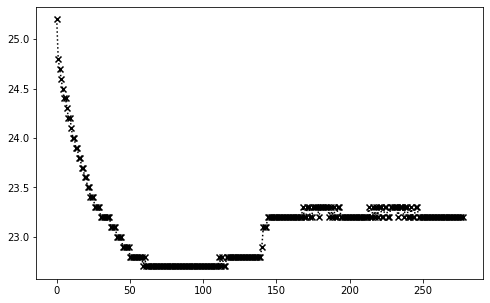

In [169]:
plt.figure(figsize = (8,5))

plt.scatter(t, T, color = 'k', marker = 'x')
plt.plot(t, T, color = 'k', linestyle = 'dotted')

# ULOHA 4 VYPAROVANI

## DATA

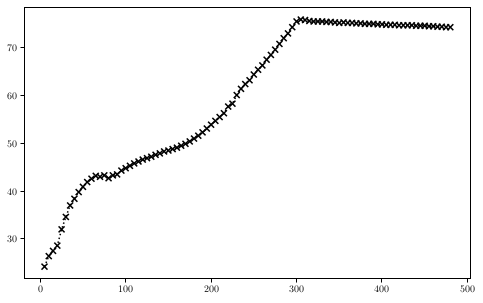

In [563]:
t1, T1 = load_txt('data/var.txt')

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x')
plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

In [564]:
T1

array([24.2, 26.4, 27.5, 28.6, 32. , 34.6, 37. , 38.4, 39.8, 40.9, 41.9,
       42.6, 43.2, 43. , 43.3, 42.7, 43.3, 43.5, 44.3, 44.8, 45.3, 45.8,
       46.2, 46.6, 46.9, 47.2, 47.6, 47.9, 48.3, 48.5, 48.8, 49.1, 49.5,
       49.9, 50.4, 51. , 51.6, 52.3, 53.1, 53.9, 54.7, 55.5, 56.3, 57.7,
       58.3, 60.1, 61.4, 62.4, 63.2, 64.4, 65.4, 66.3, 67.5, 68.5, 69.6,
       70.8, 72. , 73. , 74.3, 75.5, 75.9, 75.8, 75.6, 75.5, 75.5, 75.5,
       75.4, 75.4, 75.3, 75.2, 75.3, 75.2, 75.2, 75.1, 75.1, 75. , 75. ,
       75. , 74.9, 74.9, 74.8, 74.8, 74.8, 74.7, 74.7, 74.7, 74.7, 74.6,
       74.6, 74.6, 74.5, 74.5, 74.4, 74.4, 74.3, 74.3])

In [565]:

after = temp(np.array([75.8, 75.6, 75.5, 75.5, 75.5,
       75.4, 75.4, 75.3, 75.2, 75.3, 75.2, 75.2, 75.1, 75.1, 75. , 75. ,
       75. , 74.9, 74.9, 74.8, 74.8, 74.8, 74.7, 74.7, 74.7, 74.7, 74.6,
       74.6, 74.6, 74.5, 74.5, 74.4, 74.4, 74.3, 74.3]))
during = temp(np.array([24.2, 26.4, 27.5, 28.6, 32. , 34.6, 37. , 38.4, 39.8, 40.9, 41.9,
       42.6, 43.2, 43. , 43.3, 42.7, 43.3, 43.5, 44.3, 44.8, 45.3, 45.8,
       46.2, 46.6, 46.9, 47.2, 47.6, 47.9, 48.3, 48.5, 48.8, 49.1, 49.5,
       49.9, 50.4, 51. , 51.6, 52.3, 53.1, 53.9, 54.7, 55.5, 56.3, 57.7,
       58.3, 60.1, 61.4, 62.4, 63.2, 64.4, 65.4, 66.3, 67.5, 68.5, 69.6,
       70.8, 72. , 73. , 74.3, 75.5, 75.9]))

#### T before = 21.6

t_after = t1[-35:]
t_during = t1[:-35]

after

array([75.85858586, 75.65656566, 75.55555556, 75.55555556, 75.55555556,
       75.45454545, 75.45454545, 75.35353535, 75.25252525, 75.35353535,
       75.25252525, 75.25252525, 75.15151515, 75.15151515, 75.05050505,
       75.05050505, 75.05050505, 74.94949495, 74.94949495, 74.84848485,
       74.84848485, 74.84848485, 74.74747475, 74.74747475, 74.74747475,
       74.74747475, 74.64646465, 74.64646465, 74.64646465, 74.54545455,
       74.54545455, 74.44444444, 74.44444444, 74.34343434, 74.34343434])

In [566]:
def linear_func(x,a,b):
    return a*x + b

params, err = curve_fit(linear_func, t_after, after)

a,b = params
a,b

(-0.007854454915477094, 78.10395269235643)

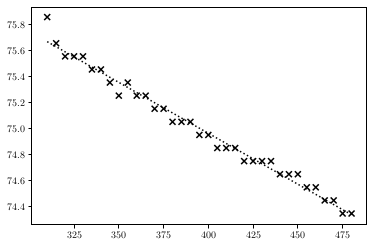

In [567]:
x_range = np.linspace(t_after[0],t_after[-1],100)

plt.scatter(t_after, after, color = 'k', marker = 'x')
plt.plot(x_range, a*x_range +b, color = 'k', linestyle = 'dotted')


In [568]:
S1 = cumulative_trapezoid(during, t_during,initial=0)
print(S1)

[    0.           124.24242424   256.81818182   394.94949495
   544.44444444   709.09090909   886.36363636  1073.23232323
  1267.17171717  1467.42424242  1672.97979798  1882.82828283
  2095.95959596  2310.1010101   2524.49494949  2738.13131313
  2951.76767677  3167.42424242  3385.60606061  3607.07070707
  3831.06060606  4057.57575758  4286.36363636  4517.17171717
  4749.74747475  4983.83838384  5219.6969697   5457.32323232
  5696.71717172  5937.62626263  6179.7979798   6423.48484848
  6668.93939394  6916.41414141  7166.16161616  7418.68686869
  7674.24242424  7933.08080808  8195.70707071  8462.37373737
  8733.08080808  9007.82828283  9286.61616162  9570.95959596
  9860.35353535 10155.80808081 10459.09090909 10768.18181818
 11081.81818182 11400.50505051 11724.74747475 12053.78787879
 12388.13131313 12728.03030303 13073.23232323 13424.24242424
 13781.31313131 14143.93939394 14512.37373737 14887.12121212
 15265.90909091]


In [569]:
S2 = cumulative_trapezoid((a*t_during + b - during)[::1], t_during,initial=0)
print(S2[::-1])

[7800.04456323 7800.19254161 7796.10375459 7785.50547487 7768.90275298
 7746.54811416 7717.9365079  7683.32045946 7643.20501935 7597.33766231
 7545.97091359 7489.6098237  7427.49681688 7360.13694364 7288.03525448
 7209.92912314 7123.7983476  7031.41060463 6933.77599523 6830.3894689
 6722.76617717 6610.90612001 6494.80929745 6374.47570947 6250.15788133
 6122.36086353 5991.33718133 5857.33935998 5720.87244999 5582.1889766
 5441.54146507 5299.18244065 5155.3644286  5009.83490366 4862.34134058
 4712.88373936 4561.46209999 4408.32894774 4253.23175735 4095.91800357
 3936.13516114 3773.63070481 3608.40463459 3439.6993747  3268.27250093
 3094.62906375 2920.78926521 2747.51068105 2573.78321026 2398.84927709
 2220.43615426 2037.53374077 1849.13193561 1654.22063775 1452.04227146
 1240.07158419 1015.27827293  775.13708514  523.43589961  265.98279716
    0.        ]


In [570]:
(S2[::-1] - S1)

array([  7800.04456323,   7675.95011737,   7539.28557277,   7390.55597992,
         7224.45830853,   7037.45720506,   6831.57287154,   6610.08813623,
         6376.03330218,   6129.91341988,   5872.99111561,   5606.78154087,
         5331.53722092,   5050.03593354,   4763.54030499,   4471.79781001,
         4172.03067084,   3863.9863622 ,   3548.16993463,   3223.31876183,
         2891.7055711 ,   2553.33036244,   2208.44566108,   1857.3039923 ,
         1500.41040658,   1138.52247969,    771.64021164,    400.01612766,
           24.15527827,   -355.43728603,   -738.25651473,  -1124.30240783,
        -1513.57496534,  -1906.57923775,  -2303.82027558,  -2705.80312933,
        -3112.78032425,  -3524.75186034,  -3942.47531335,  -4366.4557338 ,
        -4796.94564694,  -5234.19757802,  -5678.21152703,  -6131.26022125,
        -6592.08103443,  -7061.17901706,  -7538.30164388,  -8020.67113714,
        -8508.03497156,  -9001.65577342,  -9504.31132048, -10016.25413801,
       -10538.99937752, -

In [571]:
T1[:28]

array([24.2, 26.4, 27.5, 28.6, 32. , 34.6, 37. , 38.4, 39.8, 40.9, 41.9,
       42.6, 43.2, 43. , 43.3, 42.7, 43.3, 43.5, 44.3, 44.8, 45.3, 45.8,
       46.2, 46.6, 46.9, 47.2, 47.6, 47.9])

## GRAF

In [572]:
a,b

(-0.007854454915477094, 78.10395269235643)

C:\Users\stepa\AppData\Local\Temp/ipykernel_7396/1749636160.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


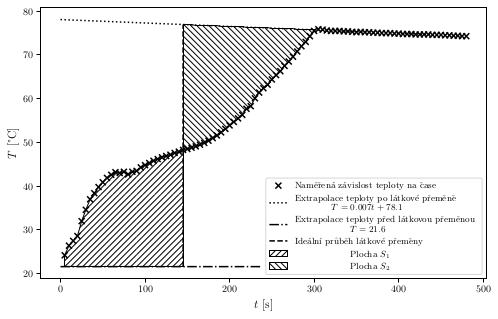

In [588]:
x_range = np.linspace(0,475,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x', label = "Naměřená závislost teploty na čase")

plt.plot(x_range, a*x_range+b, color = 'k', linestyle = 'dotted', label = "Extrapolace teploty po látkové přeměně \n \qquad \qquad $T = 0.007t + 78.1$")
plt.plot(x_range[:100], np.full(100,21.6), color = 'k', linestyle = 'dashdot',  label = "Extrapolace teploty před látkovou přeměnou \n \qquad \qquad \qquad $T = 21.6$")

plt.plot(np.full(100,145), np.linspace(21.6,a*145 + b,100), color = 'k', linestyle = 'dashed', label = "Ideální průběh látkové přeměny")

plt.fill_between(t1[:29], T1[:29], 21.6, color='k', facecolor="none", hatch = '////', linewidth=0.5, label = " \qquad \qquad \qquad Plocha $S_1$")
plt.fill_between(t1[28:60], a*t1[28:60]+b, T1[28:60], color='k', facecolor="none", hatch = r"\\\\", linewidth=0.5, label = "\qquad \qquad \qquad Plocha $S_2$")

#plt.legend( loc='lower right', fontsize=9)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2,4,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower right', fontsize=9)

#popisky os
plt.ylabel("$T$ [°C]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('var.pdf', bbox_inches = 'tight')
plt.show()

In [589]:
a*t_during + b - during

array([54.32730668, 52.06581218, 50.9154288 , 49.76504541, 46.2914297 ,
       43.6258948 , 41.1623801 , 39.70896641, 38.25555273, 37.10516934,
       36.05579606, 35.30945307, 34.66412019, 34.82686812, 34.48456554,
       35.05135387, 34.40602099, 34.16472852, 33.31737543, 32.77305266,
       32.22872988, 31.6844071 , 31.24109442, 30.79778174, 30.45547916,
       30.11317658, 29.66986391, 29.32756133, 28.88424865, 28.64295617,
       28.30065359, 27.95835102, 27.51503834, 27.07172566, 26.52740288,
       25.88207   , 25.23673712, 24.49039414, 23.64304105, 22.79568797,
       21.94833489, 21.10098181, 20.25362872, 18.80021504, 18.15488215,
       16.29742806, 14.94502447, 13.89565119, 13.04829811, 11.79690462,
       10.74753134,  9.79916815,  8.54777467,  7.49840138,  6.34801799,
        5.09662451,  3.84523102,  2.79585774,  1.44345415,  0.19206066,
       -0.25125202])

In [590]:
t_during[28] #### OBSAHY SE ROVNAJI u 28 TJ. 145

145.0

In [591]:
a*145 + b

76.96505672961226

## TEPLO VARU

In [621]:
395.02 - 240.58

154.43999999999997

In [592]:
b = 98090 / 133.322368
tv = 100 + 0.03687*(b-760) - 0.000022*(b-760)**2
print(tv)

99.09241529519223


In [593]:
m1 = 395.02 - 240.58
c1 = 4.18
m = 19.86
t1 = 21.6
t = 76.96 ##75.8 bez extrapolace

In [594]:
lk = ((m1*c1 + k)*(t - t1)-m*c1*(tv-t))/m
lk

2222.814343616342

In [595]:
slk = lk*np.sqrt(0.7**2/(t - t1)**2 + 0.7**2/(tv-t))
slk

331.93217532414025

# ULOHA 5 TANI

## DATA

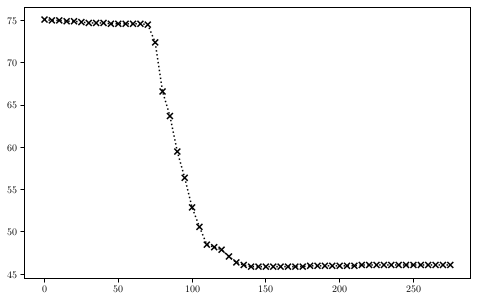

In [596]:
t1, T1 = load_txt('data/tani.txt')

x_range = np.linspace(0,100,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x')
plt.plot(t1, T1, color = 'k', linestyle = 'dotted')

In [597]:
T1

array([75.1, 75. , 75. , 74.9, 74.9, 74.8, 74.7, 74.7, 74.7, 74.6, 74.6,
       74.6, 74.6, 74.6, 74.5, 72.4, 66.6, 63.7, 59.5, 56.4, 52.9, 50.6,
       48.5, 48.2, 47.9, 47.1, 46.4, 46.1, 45.9, 45.9, 45.9, 45.9, 45.9,
       45.9, 45.9, 45.9, 46. , 46. , 46. , 46. , 46. , 46. , 46. , 46.1,
       46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1,
       46.1])

In [598]:

before = temp(np.array([75.1, 75. , 75. , 74.9, 74.9, 74.8, 74.7, 74.7, 74.7, 74.6, 74.6,
       74.6, 74.6, 74.6, 74.5]))

after = temp(np.array([45.9, 45.9, 45.9, 45.9, 45.9,
       45.9, 45.9, 45.9, 46. , 46. , 46. , 46. , 46. , 46. , 46. , 46.1,
       46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1, 46.1,
       46.1]))

during = temp(np.array([72.4, 66.6, 63.7, 59.5, 56.4, 52.9, 50.6,
       48.5, 48.2, 47.9, 47.1, 46.4, 46.1]))


t_after = t1[-28:]
t_before = t1[:15]
t_during = t1[15:28]


In [599]:
def linear_func(x,i,j):
    return i*x + j

params, err = curve_fit(linear_func, t_after, after)

a1,b1 = params
a1,b1

(0.0019627031099511694, 45.36835237994355)

In [600]:
params, err = curve_fit(linear_func, t_before, before)

a2,b2 = params
a2,b2

(-0.008008658010857594, 75.08164983181145)

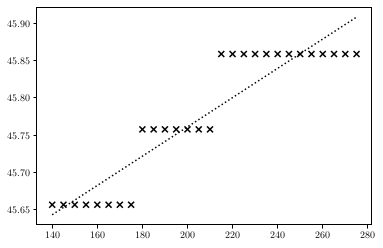

In [601]:
x_range = np.linspace(t_after[0],t_after[-1],100)

plt.scatter(t_after, after, color = 'k', marker = 'x')
plt.plot(x_range, a1*x_range +b1, color = 'k', linestyle = 'dotted')


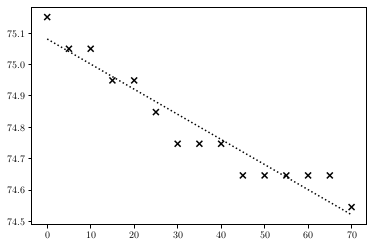

In [602]:
x_range = np.linspace(t_before[0],t_before[-1],100)

plt.scatter(t_before, before, color = 'k', marker = 'x')
plt.plot(x_range, a2*x_range +b2, color = 'k', linestyle = 'dotted')

In [603]:
S1 = cumulative_trapezoid(during - a1*t_during -b1 , t_during,initial=0)
print(S1-491.03887812)

[-4.91038878e+02 -3.71166440e+02 -2.73312766e+02 -1.93437453e+02
 -1.32045551e+02 -8.73693835e+01 -5.73887479e+01 -3.85682910e+01
 -2.58575078e+01 -1.47109436e+01 -6.39122479e+00 -1.90845234e+00
 -4.25478675e-09]


In [604]:
S2 = cumulative_trapezoid((a2*t_during + b2 - during), t_during,initial=0)
print(S2)

[   0.           24.83014671   71.42977393  135.75847763  218.32130832
  317.35058922  430.82611833  555.21254209  685.45935546  817.02110389
  951.16041366 1088.88738576 1228.93939394]


In [605]:
(S1[::-1] - 491 - S2)

array([ 3.88781157e-02, -2.66997209e+01, -7.77821206e+01, -1.50430543e+02,
       -2.44139938e+02, -3.55880002e+02, -4.88175988e+02, -6.42543047e+02,
       -8.17466029e+02, -1.01041968e+03, -1.22443430e+03, -1.46001495e+03,
       -1.71993939e+03])

In [606]:
T1[:28]

array([75.1, 75. , 75. , 74.9, 74.9, 74.8, 74.7, 74.7, 74.7, 74.6, 74.6,
       74.6, 74.6, 74.6, 74.5, 72.4, 66.6, 63.7, 59.5, 56.4, 52.9, 50.6,
       48.5, 48.2, 47.9, 47.1, 46.4, 46.1])

## GRAF

In [607]:
a1,b1

(0.0019627031099511694, 45.36835237994355)

In [608]:
a2,b2

(-0.008008658010857594, 75.08164983181145)

C:\Users\stepa\AppData\Local\Temp/ipykernel_7396/1023012655.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


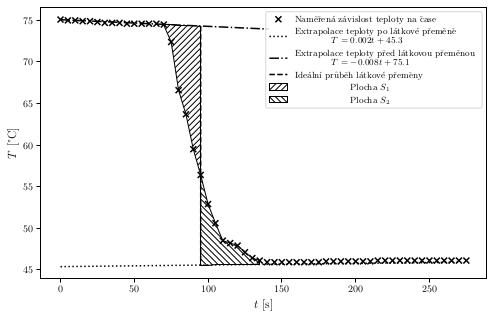

In [615]:
x_range = np.linspace(0,270,200)

plt.figure(figsize = (8,5))

plt.scatter(t1, T1, color = 'k', marker = 'x', label = "Naměřená závislost teploty na čase")

plt.plot(x_range, a1*x_range+b1, color = 'k', linestyle = 'dotted', label = "Extrapolace teploty po látkové přeměně \n \qquad \qquad  $T = 0.002t + 45.3$")
plt.plot(x_range[:105], a2*x_range[:105]+b2, color = 'k', linestyle = 'dashdot',  label = "Extrapolace teploty před látkovou přeměnou \n \qquad \qquad $T = -0.008t + 75.1$")

plt.plot(np.full(100,95), np.linspace(a2*95 + b2,a1*95 + b1,100), color = 'k', linestyle = 'dashed', label = "Ideální průběh látkové přeměny")

plt.fill_between(t1[14:20], T1[14:20], a2*t1[14:20]+b2, color='k', facecolor="none", hatch = '////', linewidth=0.5, label = "\qquad \qquad \qquad Plocha $S_1$")
plt.fill_between(t1[19:28], a1*t1[19:28]+b1, T1[19:28], color='k', facecolor="none", hatch = r"\\\\", linewidth=0.5, label = "\qquad \qquad \qquad Plocha $S_2$")

#plt.legend( loc='lower right', fontsize=9)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2,4,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right', fontsize=9)

#popisky os
plt.ylabel("$T$ [°C]", fontsize=12)
plt.xlabel("$t$ [s]", fontsize=12)

plt.savefig('tani.pdf', bbox_inches = 'tight')
plt.show()

In [616]:
t_during[4] #### OBSAHY SE ROVNAJI u 4 TJ. 95

95.0

In [617]:
before[-1], after[-1]

(74.54545454545455, 45.85858585858586)

In [618]:
a1*95 + b1

45.55480917538891

In [619]:
a2*95 + b2

74.32082732077997

## TEPLO TANI

In [622]:
398.06 - 240.58

157.48

In [623]:
434.64 - 398.06

36.579999999999984

In [535]:
m1 = 398.06 - 240.58
c1 = 4.18
m = 434.64 - 398.06
t1 = 74.32
t = 45.55

In [540]:
lt = ((m1*c1)*(t1 - t)-m*c1*(t))/m
lt

327.3244644067798

In [541]:
slk = lt*np.sqrt(0.7**2/(t1 - t)**2 + 0.5**2/(t))
slk

25.52389390022096